In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Model():
    def __init__(self) -> None:
        pass
    
    def getPredict(self, x, w, b):
        return w * x + b


class Loss():
    def __init__(self) -> None:
        self.w_gradient = 0.0
        self.b_gradient = 0.0

    def L1(self, x, y, y_pred, N):
        if y - y_pred >= 0:
            self.w_gradient += -x * (1 / N)
            self.b_gradient += -1 * (1 / N)
        elif y - y_pred < 0:
            self.w_gradient += x * (1 / N)
            self.b_gradient += 1 * (1 / N)
        return [self.w_gradient, self.b_gradient]

            
class Optimizer():
    def __init__(self) -> None:
        pass

    def SGD(self, w_in, b_in, w_gradient, b_gradient, learning_rate):
        w_update = w_in - (learning_rate * w_gradient)
        b_update = b_in - (learning_rate * b_gradient)
        return[w_update, b_update]


class Trainer():
    def __init__(self, data, lr, iter_num, w_init, b_init):
        self.train_data = data
        self.learning_rate = lr
        self.max_iter_num = iter_num
        self.init_weight = w_init
        self.init_bias = b_init

    def train(self):
        w_upt = self.init_weight
        b_upt = self.init_bias
        for i in range(self.max_iter_num):
            [w_upt, b_upt] = self.epoch_train(w_iter=w_upt, b_iter=b_upt)
            if i % 500 == 0:
                print("iteration[{}], val_acc is {:.4f}".format(i, self.calcValAcc(w=w_upt, b=b_upt)))
        return [w_upt, b_upt]


    def epoch_train(self, w_iter, b_iter):
        N = float(len(self.train_data))
        model = Model()
        loss = Loss()
        optim = Optimizer()

        for index in range(0, len(self.train_data)):
            x = self.train_data[index, 0]
            y = self.train_data[index, 1]

            # Get prediction
            y_pred = model.getPredict(x, w_iter, b_iter)
            # Calc L1 loss
            loss.L1(x, y, y_pred, N)
        
        # Calc SGD
        w_grad = loss.w_gradient
        b_grad = loss.b_gradient
        update = optim.SGD(w_iter, b_iter, w_grad, b_grad, self.learning_rate)
        return update        

    def calcValAcc(self, w, b):
        model = Model()
        val_acc = 0.0

        for index in range(0, len(self.train_data)):
            x = self.train_data[index, 0]
            y = self.train_data[index, 1]
            y_pred = model.getPredict(x, w, b)
            val_acc += np.abs(y - y_pred)
        # Visualization
        plt.cla()
        plt.scatter(self.train_data[:, 0], self.train_data[:, 1])
        plt.plot(self.train_data[:, 0], model.getPredict(self.train_data[:, 0], w, b), 'r-', lw=5)
        plt.show()
        return val_acc / float(len(self.train_data))


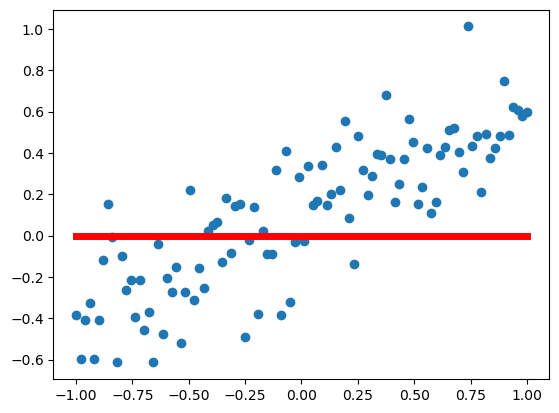

Starting gradient descent at weight=0.0 bias=0.0 val_acc=0.31850693248557865
### START TRAINING ###


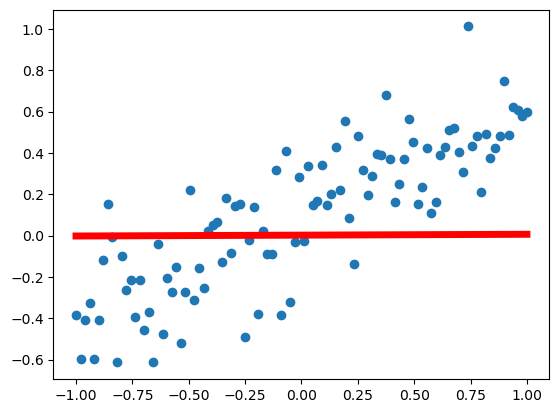

iteration[0], val_acc is 0.3163


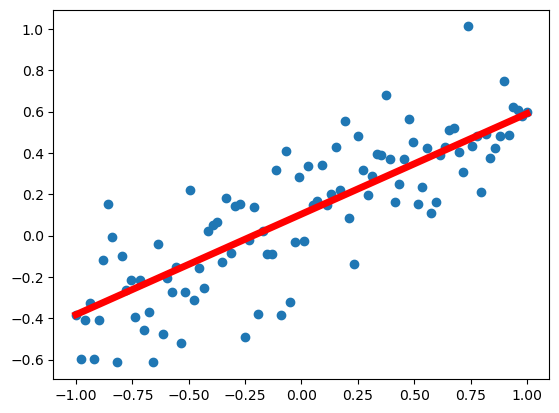

iteration[500], val_acc is 0.1528


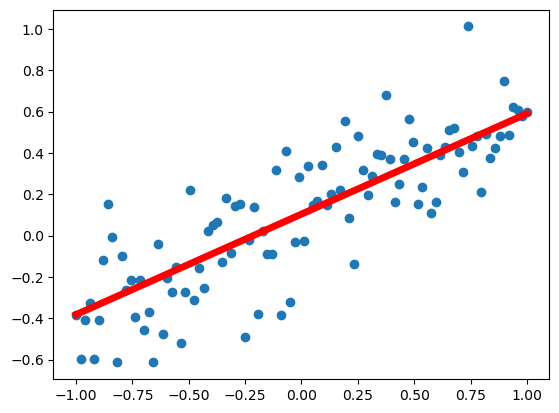

iteration[1000], val_acc is 0.1528


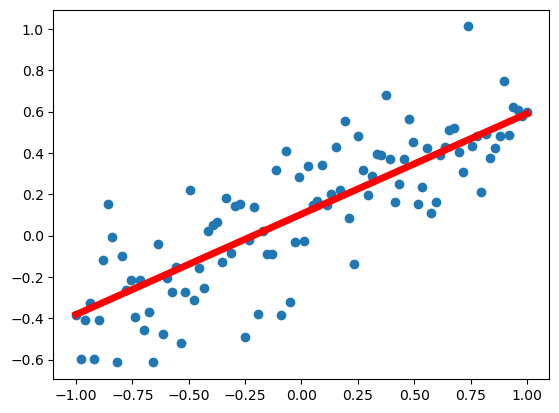

iteration[1500], val_acc is 0.1528


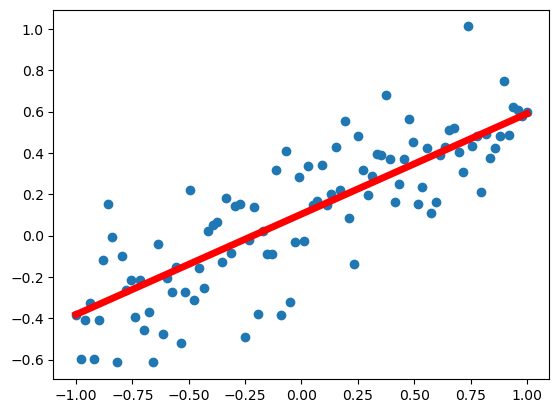

iteration[2000], val_acc is 0.1528


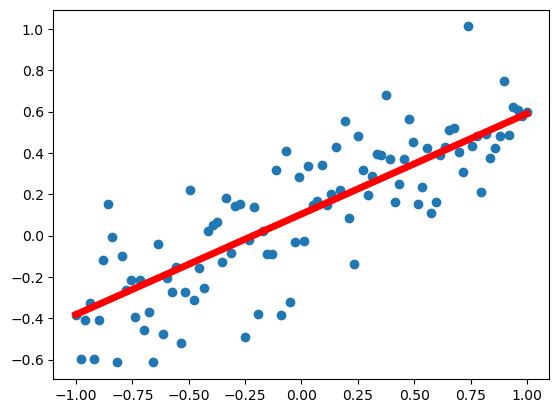

iteration[2500], val_acc is 0.1528


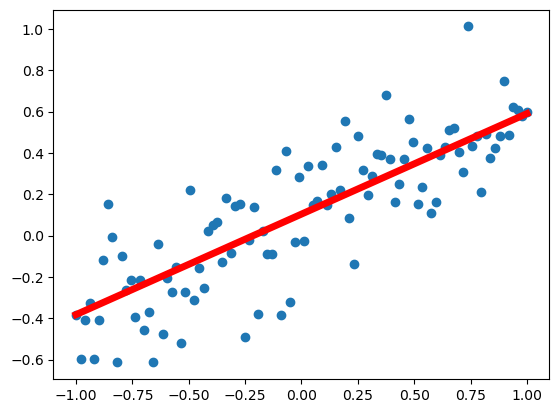

iteration[3000], val_acc is 0.1528


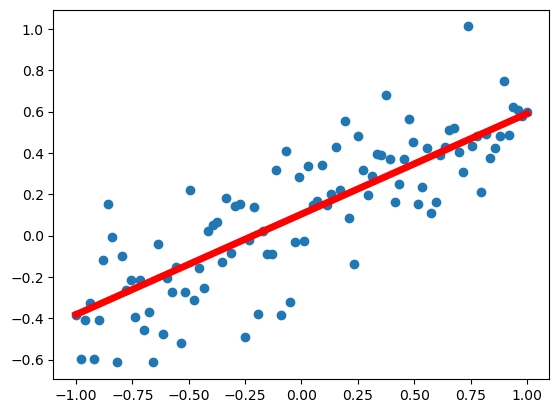

iteration[3500], val_acc is 0.1528


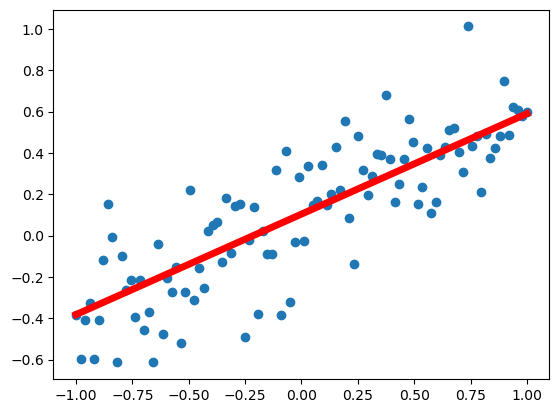

iteration[4000], val_acc is 0.1528


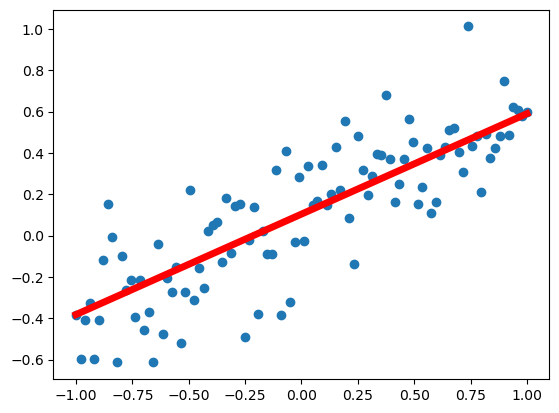

iteration[4500], val_acc is 0.1528


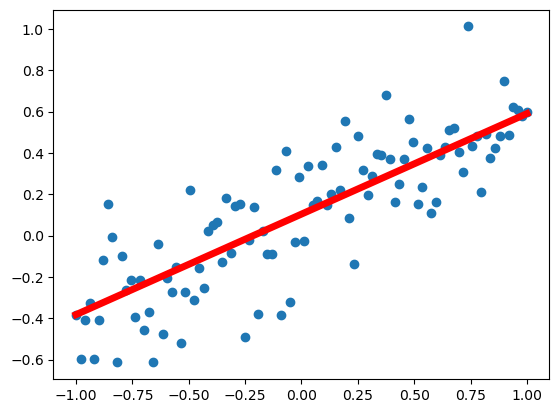

iteration[5000], val_acc is 0.1528
### TRAINING STOPPED ###


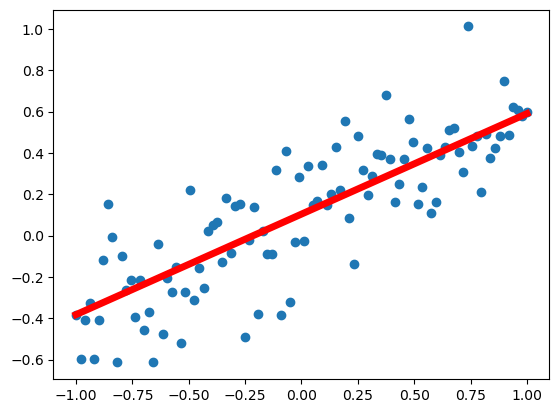

Trained 5001 iterations: weight=0.4864404040403828 bias=0.1040000000000001 val_acc=0.15284322376158724


In [8]:
def main():
    # data simulation
    w_tgt = 0.5
    b_tgt = 0.1
    noise = 0.2 * np.random.randn(100)
    points = np.zeros((100, 2))
    points[:, 0] = np.linspace(start=-1, stop=1, num=100)
    points[:, 1] = w_tgt * points[:, 0] + b_tgt + noise   # ground truth: y = 0.5 * x + 0.1

    # parameters setup
    learning_rate = 0.01
    w_init = 0.0
    b_init = 0.0
    inter_num = 5001
    lr_trainer = Trainer(points, learning_rate, inter_num, w_init, b_init)

    # print
    print("Starting gradient descent at weight={} bias={} val_acc={}".format(w_init, b_init, lr_trainer.calcValAcc(w_init, b_init)))

    # training loop
    print("### START TRAINING ###")
    [w, b] = lr_trainer.train()
    print("### TRAINING STOPPED ###")
    print("Trained {} iterations: weight={} bias={} val_acc={}".format(inter_num, w, b, lr_trainer.calcValAcc(w, b)))


if __name__ == '__main__':
    main()